<a href="https://colab.research.google.com/github/Vaishak/telecom_churn/blob/main/Telecom_Churn_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color = Brown> Telecom Churn Case Study Assignment 
#### <font color = Green> By **Karthikeyan Loganathan** & **Vaishak J** 

## **Assigment Details** 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

**Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.**


## **What you need to do?**

**1. Derive new features**

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

**2. Filter high-value customers**

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

**3. Tag churners and remove attributes of the churn phase**

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.


The attributes you need to use to tag churners are:

        total_ic_mou_9
        total_og_mou_9
        vol_2g_mb_9
        vol_3g_mb_9

Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.



#  <font color = Brown>Assignment Solution</font>

## <font color = Blue>Approach</font>

**1. Load and understand the Data**

**2. Data Pre-Processing** 
    - Handing Missing Values
    - Data Cleaning 
    
**3. Identify High Value Customers**
    - Calculate Average Usage 
    - Apply 70-30 Rule
    - Filter only High Value Customer for Model building 

**4. Derive New features**
    - Analyze and derive the target Variable 
    - Identify and derive New features which value add for Model building

**5. Data Processing** 
    - Perform EDA
    - Perform Outlier treatment
    - Split Data 
    - Perform Data Balancing 
    - Scale the Data

**6. Model Building (3-Good Prediction & 1- Good interruptible[logistic regression])**
    - Build Model 
    - Model evaluation 
    - Perform Hyper Tuning
    - Model evaluation 

**7. Conclusion**
    - Choose a Model based on various evaluation Criteria 
    - Derive "the important features for churn"
    - Conveys the importance of features [use plots, summary tables]
    - Recommend strategies to manage customer churn

## <font color = Blue>Importing Libraries</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import datetime as dt


## Libraries related to Modeling 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score


In [ ]:
## Set the Column width 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## <font color = Blue>Load,Read and understand the data</font>

### **Loading Data to Google Colab from Google Drive** 

<font color = Grey> *Optional- Used only when the data need to read from Google Drive*</font>

Below section is used only when program using Google Colab, for normal usage can use other method

In [ ]:
# from google.colab import files
# Datauploaded = files.upload()
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Load the data from the Google Drive for the Applciation.csv
downloaded = drive.CreateFile({'id':"15k1DI-lPRjg2PfJYJPVjsjX17vrUrut5"}) 
downloaded.GetContentFile('telecom_churn_data.csv')

### **Load and understand the Telecom Data**

In [ ]:
# Read the data 
churn_data=pd.read_csv("telecom_churn_data.csv")

In [ ]:
# Check sample Data
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [ ]:
churn_data.shape

(99999, 226)

In [ ]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [ ]:
#understand the column and datatypes
#churn_data.info(verbose=True, null_counts=True)

In [ ]:
churn_data.select_dtypes(include=np.object)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [ ]:
list(churn_data.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [ ]:
#Check the uniqueness of the data 
churn_data.mobile_number.nunique()

99999

## <font color = Blue>Data Pre-Processing</font>

- Handing Missing Values
- Data Cleaning 

### Handling Missing Values

In [ ]:
# Find the Columns and the percentage of Null Values 
NullVal=pd.DataFrame(churn_data.isnull().sum()/len(churn_data)*100)
NullVal.reset_index(inplace=True)
NullVal.columns=['ColName', "NullPercent"]

In [ ]:
#List the Columns which has the null percentage > 10
NullVal[NullVal["NullPercent"]>10]

,ColName,NullPercent
157,date_of_last_rech_data_6,74.846748
158,date_of_last_rech_data_7,74.428744
159,date_of_last_rech_data_8,73.660737
160,date_of_last_rech_data_9,74.077741
161,total_rech_data_6,74.846748
162,total_rech_data_7,74.428744
163,total_rech_data_8,73.660737
164,total_rech_data_9,74.077741
165,max_rech_data_6,74.846748
166,max_rech_data_7,74.428744


In [ ]:
# Find Number Columns having Null % > 10
len(NullVal[NullVal["NullPercent"]>10])

40

In [ ]:
# Find Number Columns having Null % > 10
churn_data.circle_id.nunique()

1

In [ ]:
churn_data.circle_id.head()

0    109
1    109
2    109
3    109
4    109
Name: circle_id, dtype: int64

**Conclusion**

Based on the Null Values and the Feature analysis below are the conclusion 

        ColName	NullPercent	Column Importance 
        date_of_last_rech_data_6	74.846748	Not Important
        date_of_last_rech_data_7	74.428744	Not Important
        date_of_last_rech_data_8	73.660737	Not Important
        date_of_last_rech_data_9	74.077741	Not Important
        max_rech_data_6	74.846748	Not Important
        max_rech_data_7	74.428744	Not Important
        max_rech_data_8	73.660737	Not Important
        max_rech_data_9	74.077741	Not Important
        count_rech_2g_6	74.846748	Not Important
        count_rech_2g_7	74.428744	Not Important
        count_rech_2g_8	73.660737	Not Important
        count_rech_2g_9	74.077741	Not Important
        count_rech_3g_6	74.846748	Not Important
        count_rech_3g_7	74.428744	Not Important
        count_rech_3g_8	73.660737	Not Important
        count_rech_3g_9	74.077741	Not Important
        av_rech_amt_data_6	74.846748	Not Important
        av_rech_amt_data_7	74.428744	Not Important
        av_rech_amt_data_8	73.660737	Not Important
        av_rech_amt_data_9	74.077741	Not Important
        arpu_3g_6	74.846748	Not Important
        arpu_3g_7	74.428744	Not Important
        arpu_3g_8	73.660737	Not Important
        arpu_3g_9	74.077741	Not Important
        arpu_2g_6	74.846748	Not Important
        arpu_2g_7	74.428744	Not Important
        arpu_2g_8	73.660737	Not Important
        arpu_2g_9	74.077741	Not Important
        night_pck_user_6	74.846748	Not Important
        night_pck_user_7	74.428744	Not Important
        night_pck_user_8	73.660737	Not Important
        night_pck_user_9	74.077741	Not Important
        fb_user_6	74.846748	Not Important
        fb_user_7	74.428744	Not Important
        fb_user_8	73.660737	Not Important
        fb_user_9	74.077741	Not Important
        total_rech_data_6	74.846748	Update with 0
        total_rech_data_7	74.428744	Update with 0
        total_rech_data_8	73.660737	Update with 0
        total_rech_data_9	74.077741	Update with 0
![image.png](attachment:image.png)

In [ ]:
churn_data.shape

(99999, 226)

### Data Cleaning 

In [ ]:
#Check and fill columns which need to fill missing values as 0 
churn_data.total_rech_data_6.fillna(0,inplace=True)
churn_data.total_rech_data_7.fillna(0,inplace=True)
churn_data.total_rech_data_8.fillna(0,inplace=True)
churn_data.total_rech_data_9.fillna(0,inplace=True)

In [ ]:
NullVal=pd.DataFrame(churn_data.isnull().sum()/len(churn_data)*100)
NullVal.reset_index(inplace=True)
NullVal.columns=['ColName', "NullPercent"]

In [ ]:
#List the Columns which has the null percentage > 10
NullVal[~(NullVal["NullPercent"]>10)]["ColName"]

0             mobile_number
1                 circle_id
2            loc_og_t2o_mou
3            std_og_t2o_mou
4            loc_ic_t2o_mou
5      last_date_of_month_6
6      last_date_of_month_7
7      last_date_of_month_8
8      last_date_of_month_9
9                    arpu_6
10                   arpu_7
11                   arpu_8
12                   arpu_9
13              onnet_mou_6
14              onnet_mou_7
15              onnet_mou_8
16              onnet_mou_9
17             offnet_mou_6
18             offnet_mou_7
19             offnet_mou_8
20             offnet_mou_9
21            roam_ic_mou_6
22            roam_ic_mou_7
23            roam_ic_mou_8
24            roam_ic_mou_9
25            roam_og_mou_6
26            roam_og_mou_7
27            roam_og_mou_8
28            roam_og_mou_9
29         loc_og_t2t_mou_6
30         loc_og_t2t_mou_7
31         loc_og_t2t_mou_8
32         loc_og_t2t_mou_9
33         loc_og_t2m_mou_6
34         loc_og_t2m_mou_7
35         loc_og_t2

In [ ]:
# Drop columns with high % of Missing  (50% and above)
Churn_data_fil=churn_data[NullVal[~(NullVal["NullPercent"]>10)]["ColName"]]

In [ ]:
Churn_data_fil.shape

(99999, 190)

## <font color = Blue>Identify High Value Customers</font>

- Calculate Average Usage 
- Apply 70-30 Rule & Filter only High Value Customer for Model building 

#### High-value customers : Those who have recharged with an amount more than or equal to 70 Perrcentile of  average recharge amount in the first two months (the good phase).

### Calculate Average Usage 

In [ ]:
#
Churn_data_fil["Avg_6n7_Month"]=(Churn_data_fil.total_rech_amt_6 + Churn_data_fil.total_rech_amt_7 + Churn_data_fil.total_rech_data_6 + Churn_data_fil.total_rech_data_7)/4

In [ ]:
Churn_data_fil.shape

(99999, 191)

In [ ]:
# find out 70th Perrcentile of the 
ptile_70 = np.percentile(Churn_data_fil.Avg_6n7_Month, 70)
ptile_70

184.75

### High Value Customer Data Frame

In [ ]:
Churn_data_hvc= Churn_data_fil.loc[Churn_data_fil.Avg_6n7_Month >= ptile_70]

In [ ]:
Churn_data_hvc.shape

(30019, 191)

**It is clear that having the 70 percentile and above , total number of Subcribers are 30019 which is 30% of total data ... so 30% of customer constitutes 70% of revenue**

## <font color = Blue>Drive Target Variable and New features</font>



- Analyze and derive the target Variable 
- Identify and derive New features which value add for Model building

### Analyze and derive the target Variable

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

The attributes you need to use to tag churners are:

    total_ic_mou_9
    total_og_mou_9
    vol_2g_mb_9
    vol_3g_mb_9

In [ ]:
# Check null value existance for the Target Varible Source
Churn_data_hvc[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

**It is clear that 4 Features which will be used to identify the churn dont have any Null values**

In [ ]:
#Identify the total usage of customer on the Churn month ie. 9
Churn_data_hvc['Total_Usage_9'] =  Churn_data_hvc.total_ic_mou_9 + Churn_data_hvc.total_og_mou_9 + Churn_data_hvc.vol_2g_mb_9 + Churn_data_hvc.vol_3g_mb_9

In [ ]:
Churn_data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_6n7_Month,Total_Usage_9
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,592.5,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,

In [ ]:
# Prepare the Churn Flag
Churn_data_hvc["Churn_flag"] = Churn_data_hvc.Total_Usage_9.apply(lambda x: 1 if x==0 else 0 )

In [ ]:
# Clean the "Total_Usage_9" 
Churn_data_hvc.drop(columns = ["Total_Usage_9"], axis=1, inplace=True)

In [ ]:
Churn_data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_6n7_Month,Churn_flag
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,592.5,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0

In [ ]:
Churn_data_hvc.Churn_flag.value_counts(normalize=True)*100

0    91.372131
1     8.627869
Name: Churn_flag, dtype: float64

**Based on above data 8.627% Churners and around 91.373% Non Churners. The Data is Completely imbalanced**

In [ ]:
Churn_data_hvc.Churn_flag.value_counts()

0    27429
1     2590
Name: Churn_flag, dtype: int64

### Drop all the Features/Columns related to 9th Month (Churn Phase Month)

In [ ]:
# List of the columns of Nineth Month
Month_9_col = list(Churn_data_hvc.filter(like='_9').columns)
Month_9_col

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [ ]:
#Drop the Column of 9th Month
Churn_data_hvc.drop(Month_9_col, inplace=True, axis=1)
Churn_data_hvc.shape

(30019, 147)

**Identify the Columns/feature which has only One value ie.. unique value for all the rows**

In [ ]:
# check for columns and unique values 
pd.set_option('display.max_rows', None)
nunqdata=pd.DataFrame(Churn_data_hvc.nunique())

In [ ]:
#identify the Columns

nunqdata.reset_index(inplace=True)
nunqdata.columns=["ColName","Cnt"]

nunqdata[nunqdata["Cnt"]==1]

,ColName,Cnt
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [ ]:
Churn_data_hvc.drop(nunqdata[nunqdata["Cnt"]==1]["ColName"],axis=1,inplace=True)

In [ ]:
Churn_data_hvc.shape

(30019, 134)

In [ ]:
# Perform Null Percent Analysis after dropping 9th Month data 
NApercent=pd.DataFrame(Churn_data_hvc.isnull().sum()/len(Churn_data_hvc)*100)
NApercent.reset_index(inplace=True)
NApercent.columns=["Columns","percent"]
NApercent[NApercent.percent>1].sort_values(by="percent",axis=0,ascending=False)

,Columns,percent
45,isd_og_mou_8,3.131350
18,loc_og_t2t_mou_8,3.131350
36,std_og_t2m_mou_8,3.131350
39,std_og_t2f_mou_8,3.131350
27,loc_og_t2c_mou_8,3.131350
42,std_og_mou_8,3.131350
48,spl_og_mou_8,3.131350
24,loc_og_t2f_mou_8,3.131350
51,og_others_8,3.131350
57,loc_ic_t2t_mou_8,3.131350


In [ ]:
pd.set_option('display.max_rows', 300)

**it is clear that maximum 3.13% of the Null values are present twe will delete the rows having missing values for these columns.**

In [ ]:
import datetime
from dateutil.parser import parse
def dt2unix(value):
    if value!=b'nan':
        d = parse(value)
        utime = (d - datetime.datetime(1970,1,1)).total_seconds()
        return utime
    
Churn_data_hvc.date_of_last_rech_6 = Churn_data_hvc.date_of_last_rech_6.astype('|S')
Churn_data_hvc.date_of_last_rech_7 = Churn_data_hvc.date_of_last_rech_7.astype('|S')
Churn_data_hvc.date_of_last_rech_8 = Churn_data_hvc.date_of_last_rech_8.astype('|S')
Churn_data_hvc.date_of_last_rech_6 = Churn_data_hvc.date_of_last_rech_6.apply(dt2unix)
Churn_data_hvc.date_of_last_rech_7 = Churn_data_hvc.date_of_last_rech_7.apply(dt2unix)
Churn_data_hvc.date_of_last_rech_8 = Churn_data_hvc.date_of_last_rech_8.apply(dt2unix)

In [ ]:
Churn_data_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_6n7_Month,Churn_flag
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,1.403827e+09,1.406246e+09,1.409011e+09,0,0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,592.5,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,1.403654e+09,1.406765e+09,1.409357e+09,50,0,10,0.0,2.0,3.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,260.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,1.403222e+09,1.40

In [ ]:
#understand the column and datatypes
Churn_data_hvc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 99997
Data columns (total 134 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        30019 non-null  int64  
 1   arpu_6               30019 non-null  float64
 2   arpu_7               30019 non-null  float64
 3   arpu_8               30019 non-null  float64
 4   onnet_mou_6          29703 non-null  float64
 5   onnet_mou_7          29716 non-null  float64
 6   onnet_mou_8          29079 non-null  float64
 7   offnet_mou_6         29703 non-null  float64
 8   offnet_mou_7         29716 non-null  float64
 9   offnet_mou_8         29079 non-null  float64
 10  roam_ic_mou_6        29703 non-null  float64
 11  roam_ic_mou_7        29716 non-null  float64
 12  roam_ic_mou_8        29079 non-null  float64
 13  roam_og_mou_6        29703 non-null  float64
 14  roam_og_mou_7        29716 non-null  float64
 15  roam_og_mou_8        29079 non-null

In [ ]:
#identify the list
NApercent[NApercent.percent>0]["Columns"]

4              onnet_mou_6
5              onnet_mou_7
6              onnet_mou_8
7             offnet_mou_6
8             offnet_mou_7
9             offnet_mou_8
10           roam_ic_mou_6
11           roam_ic_mou_7
12           roam_ic_mou_8
13           roam_og_mou_6
14           roam_og_mou_7
15           roam_og_mou_8
16        loc_og_t2t_mou_6
17        loc_og_t2t_mou_7
18        loc_og_t2t_mou_8
19        loc_og_t2m_mou_6
20        loc_og_t2m_mou_7
21        loc_og_t2m_mou_8
22        loc_og_t2f_mou_6
23        loc_og_t2f_mou_7
24        loc_og_t2f_mou_8
25        loc_og_t2c_mou_6
26        loc_og_t2c_mou_7
27        loc_og_t2c_mou_8
28            loc_og_mou_6
29            loc_og_mou_7
30            loc_og_mou_8
31        std_og_t2t_mou_6
32        std_og_t2t_mou_7
33        std_og_t2t_mou_8
34        std_og_t2m_mou_6
35        std_og_t2m_mou_7
36        std_og_t2m_mou_8
37        std_og_t2f_mou_6
38        std_og_t2f_mou_7
39        std_og_t2f_mou_8
40            std_og_mou_6
4

In [ ]:
Churn_data_hvc.shape

(30019, 134)

In [ ]:
# Drop Rowns having Null Values 
for i in NApercent[NApercent.percent>0]["Columns"]:
    print(i)
    Churn_data_hvc = Churn_data_hvc[~np.isnan(Churn_data_hvc[i])]

onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7
std_ic_t2t_mou_8
std_ic_t2m_mou_6
std_ic_t2m_mou_7
std_ic_t2m_mou_

In [ ]:
Churn_data_hvc.shape

(28493, 134)

In [ ]:
NApercent=pd.DataFrame(Churn_data_hvc.isnull().sum()/len(Churn_data_hvc)*100)
NApercent.reset_index(inplace=True)
NApercent.columns=["Columns","percent"]
NApercent[NApercent.percent>0].sort_values(by="percent",axis=0,ascending=False)

,Columns,percent


**Now all the Null Values are cleared, Should Proceed for next steps**

In [ ]:
Churn_data_hvc.Churn_flag.value_counts(normalize=True)*100

0    93.86516
1     6.13484
Name: Churn_flag, dtype: float64

**There is Imbalance in the data after the Null values are removed.** Data IMbalance will be handled once the train test split is done 

### Derive New Features

In [ ]:
#understand the column and datatypes
Churn_data_hvc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28493 entries, 7 to 99997
Data columns (total 134 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        28493 non-null  int64  
 1   arpu_6               28493 non-null  float64
 2   arpu_7               28493 non-null  float64
 3   arpu_8               28493 non-null  float64
 4   onnet_mou_6          28493 non-null  float64
 5   onnet_mou_7          28493 non-null  float64
 6   onnet_mou_8          28493 non-null  float64
 7   offnet_mou_6         28493 non-null  float64
 8   offnet_mou_7         28493 non-null  float64
 9   offnet_mou_8         28493 non-null  float64
 10  roam_ic_mou_6        28493 non-null  float64
 11  roam_ic_mou_7        28493 non-null  float64
 12  roam_ic_mou_8        28493 non-null  float64
 13  roam_og_mou_6        28493 non-null  float64
 14  roam_og_mou_7        28493 non-null  float64
 15  roam_og_mou_8        28493 non-null

In [ ]:
#Churn_data_hvc.to_excel("Churn_data_hvc.xlsx")

**Newly Derived Columns are** 

- total_mou_6
- total_mou_7
- total_mou_8
- data_vol_7
- data_vol_8
- data_vol_6

these columns explains the Total Data usage in the month and total Minutes of USage in the Month 

![image.png](attachment:image.png)

In [ ]:
#Derived Columns 
Churn_data_hvc.shape

(28493, 134)

In [ ]:
# Prepare the Derived columns
Churn_data_hvc["data_vol_6"]=Churn_data_hvc.vol_2g_mb_6+Churn_data_hvc.vol_3g_mb_6
Churn_data_hvc["data_vol_7"]=Churn_data_hvc.vol_2g_mb_7+Churn_data_hvc.vol_3g_mb_7
Churn_data_hvc["data_vol_8"]=Churn_data_hvc.vol_2g_mb_8+Churn_data_hvc.vol_3g_mb_8

Churn_data_hvc["total_mou_6"]=Churn_data_hvc.total_og_mou_6 + Churn_data_hvc.total_ic_mou_6
Churn_data_hvc["total_mou_7"]=Churn_data_hvc.total_og_mou_7 + Churn_data_hvc.total_ic_mou_7
Churn_data_hvc["total_mou_8"]=Churn_data_hvc.total_og_mou_8 + Churn_data_hvc.total_ic_mou_8

In [ ]:
Churn_data_hvc.drop(["vol_2g_mb_6","vol_3g_mb_6","vol_2g_mb_7","vol_3g_mb_7","vol_2g_mb_8","vol_3g_mb_8"],axis=1,inplace=True)

Churn_data_hvc.drop(["total_og_mou_6","total_ic_mou_6","total_og_mou_7","total_ic_mou_7","total_og_mou_8","total_ic_mou_8"],axis=1,inplace=True)

In [ ]:
# Convert AON as Monthly Data

Churn_data_hvc['aon_mon'] = Churn_data_hvc['aon']/30
Churn_data_hvc.drop('aon', axis=1, inplace=True)
Churn_data_hvc['aon_mon'].head()

7     26.733333
8     10.500000
13    86.900000
16    17.033333
17    22.233333
Name: aon_mon, dtype: float64

In [ ]:
Churn_data_hvc.shape

(28493, 128)

In [ ]:
#Churn_data_hvc.to_excel("Churn_data_hvc_1.xlsx")

In [ ]:
Churn_data_Proces=Churn_data_hvc[:]

## <font color = Blue>Data Processing</font>

 - Perform EDA
 - Perform Outlier treatment
 - Split Data
 - Perform Data Balancing

### Perform EDA

In [ ]:
Churn_data_Proces.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_6n7_Month,Churn_flag,data_vol_6,data_vol_7,data_vol_8,total_mou_6,total_mou_7,total_mou_8,aon_mon
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,1.403827e+09,1.406246e+09,1.409011e+09,0,0,779,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,592.5,1,0.0,0.00,0.00,1113.99,1167.28,778.90,26.733333
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,1.403654e+09,1.406765e+09,1.409357e+09,50,0,10,0.0,2.0,3.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,260.0,0,0.0,1106.95,11.97,612.22,460.15,188.10,10.500000
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,1.403222e+09,1.405987e+09,1.409357e+09,110,50,0,0.0,0.0,3.0,0,0,0,0,0,3,0,0,0,0,0,0,0.00,0.00,0.00,0.0,190.0,0,0.0,0.00,0.02,1875.70,364.99,2159.79,86.900000
16,7000875565,430.975,299.869,187.894,50.51,7

In [ ]:
# #Identify the Column Types
# list(Churn_data_Proces.columns)

# for dat in Churn_data_Proces.columns:
#     print(Churn_data_Proces[dat].value_counts())


print("LRK")

LRK


In [ ]:
# plotting correlations on a heatmap

corData = Churn_data_Proces.corr()
corData.loc[:,:] = np.tril(corData, k=-1)
corData = corData.stack()
corData[(corData > 0.60) | (corData < -0.60)].sort_values()


# # figure size
# plt.figure(figsize=(30,24))


# # heatmap
# sns.heatmap(Churn_data_Proces.corr(), cmap="YlGnBu", annot=True)
# plt.show()

std_ic_mou_7        std_ic_t2m_mou_8     0.600141
roam_og_mou_8       roam_og_mou_7        0.601546
max_rech_amt_8      max_rech_amt_7       0.603737
total_mou_8         onnet_mou_8          0.605184
loc_og_mou_6        loc_og_t2t_mou_7     0.605355
roam_og_mou_7       roam_ic_mou_7        0.605466
total_rech_data_8   total_rech_data_6    0.605962
std_ic_mou_6        std_ic_t2m_mou_7     0.606692
loc_og_mou_6        loc_og_t2m_mou_7     0.606984
jun_vbc_3g          aug_vbc_3g           0.609291
loc_og_mou_7        loc_og_t2m_mou_6     0.610091
std_og_t2t_mou_8    std_og_t2t_mou_6     0.614291
last_day_rch_amt_6  max_rech_amt_6       0.614853
roam_ic_mou_8       roam_ic_mou_7        0.615506
std_og_mou_8        onnet_mou_8          0.615818
sachet_2g_8         total_rech_data_7    0.615892
onnet_mou_8         onnet_mou_6          0.616105
std_og_t2m_mou_6    offnet_mou_7         0.620238
isd_ic_mou_8        isd_ic_mou_6         0.620775
std_og_t2m_mou_7    offnet_mou_8         0.621302


#### Univariate Analysis

Fields Consider for univariate Analysis are below 



**From the Data it is clear that all the column are continous data, so continous based Data Analysis is high priority**

In [ ]:
Churn_data_Y=Churn_data_Proces[Churn_data_Proces["Churn_flag"]==1]
Churn_data_N=Churn_data_Proces[Churn_data_Proces["Churn_flag"]==0]

In [ ]:
Churn_data_Y.shape

(1748, 128)

In [ ]:
Churn_data_N.shape

(26745, 128)

### Perform Outlier treatment

### Split X and y

In [ ]:
Churn_data_Proces["Churn_flag"].value_counts(normalize=True)*100

0    93.86516
1     6.13484
Name: Churn_flag, dtype: float64

**Data is highly Imbalanced so must apply Data Balancing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Churn_data_Proces.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sep_vbc_3g', 'Avg_6n7_Month', 'Churn_flag', 'data_vol_6', 'data_vol_7',
       'data_vol_8', 'total_mou_6', 'total_mou_7', 'total_mou_8', 'aon_mon'],
      dtype='object', length=128)

In [ ]:
X_raw = Churn_data_Proces.drop(['Churn_flag','mobile_number'], axis=1)

X_raw.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_6n7_Month,data_vol_6,data_vol_7,data_vol_8,total_mou_6,total_mou_7,total_mou_8,aon_mon
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,1.403827e+09,1.406246e+09,1.409011e+09,0,0,779,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,592.5,0.0,0.00,0.00,1113.99,1167.28,778.90,26.733333
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,1.403654e+09,1.406765e+09,1.409357e+09,50,0,10,0.0,2.0,3.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,260.0,0.0,1106.95,11.97,612.22,460.15,188.10,10.500000
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,1.403222e+09,1.405987e+09,1.409357e+09,110,50,0,0.0,0.0,3.0,0,0,0,0,0,3,0,0,0,0,0,0,0.00,0.00,0.00,0.0,190.0,0.0,0.00,0.02,1875.70,364.99,2159.79,86.900000
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,

In [ ]:
y_raw = Churn_data_Proces['Churn_flag']

In [ ]:
y_raw.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn_flag, dtype: int64

### Scale the data

In [ ]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_raw)
X = scaler.transform(X_raw)
y=y_raw[:]

In [ ]:
X_raw.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jun_vbc_3g', 'sep_vbc_3g', 'Avg_6n7_Month', 'data_vol_6', 'data_vol_7',
       'data_vol_8', 'total_mou_6', 'total_mou_7', 'total_mou_8', 'aon_mon'],
      dtype='object', length=126)

### Split Test and Train Data Set

In [ ]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (19945, 126)
X_test: (8548, 126)


### Data Balancing

In [ ]:

# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [ ]:

print("X_tr Shape:", X_tr.shape)
print("y_tr Shape:", y_tr.shape)

print ("count of 0 :",(y_tr==0).sum())
print ("count of 1 :",(y_tr==1).sum())




X_tr Shape: (37410, 126)
y_tr Shape: (37410,)
count of 0 : 18705
count of 1 : 18705


In [ ]:
y_trd= pd.DataFrame(y_tr,columns=['Churn_flag'])
X_trd = pd.DataFrame(X_tr, columns =X_raw.columns)

## <font color = Blue>Model Building - Good Interruptable Model</font>

**Steps:**
- Build Model 
- Evaluate model
- Tune the Model
- Re-Evaluate Module
- Conclude the Model

**List of Model**
- Good Interruptable Model
  - Logistic Regression 
- Good decision Model
  - Decision Tree
  - Random Forest 

### **Logistic Regression**

#### Model Building

In [ ]:
# Logistic regression model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trd, y_trd, test_size=0.2, random_state=99)

#### Apply RFE to reduce the number of features


In [ ]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [ ]:
# lets RFE select 15 most imp features for us
rfe = RFE(logreg, 15)   
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
# print("15 most important features selected by RFE ", rfe_features)

[('arpu_6', False, 60),
 ('arpu_7', False, 12),
 ('arpu_8', False, 23),
 ('onnet_mou_6', False, 55),
 ('onnet_mou_7', False, 66),
 ('onnet_mou_8', False, 89),
 ('offnet_mou_6', False, 16),
 ('offnet_mou_7', False, 10),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 56),
 ('roam_ic_mou_7', False, 67),
 ('roam_ic_mou_8', False, 72),
 ('roam_og_mou_6', False, 104),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 8),
 ('loc_og_t2t_mou_6', False, 48),
 ('loc_og_t2t_mou_7', False, 87),
 ('loc_og_t2t_mou_8', False, 11),
 ('loc_og_t2m_mou_6', False, 75),
 ('loc_og_t2m_mou_7', False, 57),
 ('loc_og_t2m_mou_8', False, 96),
 ('loc_og_t2f_mou_6', False, 18),
 ('loc_og_t2f_mou_7', False, 17),
 ('loc_og_t2f_mou_8', False, 111),
 ('loc_og_t2c_mou_6', False, 93),
 ('loc_og_t2c_mou_7', False, 103),
 ('loc_og_t2c_mou_8', False, 32),
 ('loc_og_mou_6', False, 94),
 ('loc_og_mou_7', False, 13),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 41),
 ('std_og_t2t_mou_7', False, 65),
 ('

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
col

Index(['offnet_mou_8', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'ic_others_7', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'total_mou_7'],
      dtype='object')

In [ ]:
X_train[col].head()

,offnet_mou_8,roam_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,og_others_8,loc_ic_t2m_mou_8,loc_ic_mou_8,std_ic_mou_8,ic_others_7,date_of_last_rech_8,last_day_rch_amt_8,monthly_2g_8,monthly_3g_8,sep_vbc_3g,total_mou_7
3351,0.034588,-0.224428,-0.708984,-0.377589,-0.018133,-0.696385,-0.751887,-0.168702,-0.096610,-2.426636,0.368427,-0.32784,-0.297458,-0.13726,-0.251776
10235,-0.511720,-0.224428,-0.162098,-0.431239,-0.018133,0.379295,0.425458,-0.348176,-0.096610,0.598131,-0.550747,-0.32784,-0.297458,-0.13726,-0.301840
33898,-0.186349,-0.224428,0.334013,-0.431080,-0.018133,0.839176,0.809864,-0.310991,-0.020802,-1.571002,0.060872,-0.32784,-0.297458,-0.13726,-0.036535
34559,-0.776665,0.141997,-0.735305,-0.431239,-0.018133,-0.727658,-0.785610,-0.348176,0.177633,-0.243583,-0.400183,-0.32784,-0.297458,-0.13726,-0.549286
24212,-0.794635,2.872525,-0.735305,-0.431239,-0.018133,-0.727658,-0.785610,-0.348176,-0.096610,-1.919266,-0.692158,-0.32784,-0.297458,-0.13726,-1.230965


In [ ]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train[:]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.coef_

array([[-0.71173049,  0.47047208, -1.11278689, -0.63364115, -1.87841569,
        -0.19079205, -0.92830212, -0.88400523, -0.5602424 , -0.66508958,
        -0.81293779, -0.62411189, -0.57551439, -1.29218167,  1.02901219]])

In [ ]:
X_rfe.columns

Index(['offnet_mou_8', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'ic_others_7', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'total_mou_7'],
      dtype='object')

In [ ]:
lr.intercept_

array([-1.86141616])

#### Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def CheckVif(X_rfe):
  vif = pd.DataFrame()
  vif['Features'] = X_rfe.columns
  vif['VIF'] = [variance_inflation_factor(X_rfe.values, i) for i in range(X_rfe.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)


In [ ]:
CheckVif(X_rfe)

               Features   VIF
6          loc_ic_mou_8  5.36
5      loc_ic_t2m_mou_8  4.86
2          loc_og_mou_8  1.74
14          total_mou_7  1.73
0          offnet_mou_8  1.53
3      std_og_t2t_mou_8  1.27
10   last_day_rch_amt_8  1.23
9   date_of_last_rech_8  1.16
12         monthly_3g_8  1.10
7          std_ic_mou_8  1.08
1         roam_og_mou_7  1.07
11         monthly_2g_8  1.06
13           sep_vbc_3g  1.03
8           ic_others_7  1.02
4           og_others_8  1.01


In [ ]:
X_rfe.drop("loc_ic_t2m_mou_8",axis=1,inplace=True)

In [ ]:
CheckVif(X_rfe)

               Features   VIF
2          loc_og_mou_8  1.74
13          total_mou_7  1.72
5          loc_ic_mou_8  1.63
0          offnet_mou_8  1.51
3      std_og_t2t_mou_8  1.27
9    last_day_rch_amt_8  1.23
8   date_of_last_rech_8  1.16
11         monthly_3g_8  1.10
6          std_ic_mou_8  1.08
1         roam_og_mou_7  1.07
10         monthly_2g_8  1.06
12           sep_vbc_3g  1.03
7           ic_others_7  1.02
4           og_others_8  1.01


**Now We have the final set of interruptable features, lets calculate the Accuracy based ont he non multicolinear data**

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.coef_

array([[-0.71964055,  0.47295609, -1.11984717, -0.63516499, -1.88290616,
        -1.08539551, -0.88556461, -0.56522092, -0.66485603, -0.81168013,
        -0.62390183, -0.57637085, -1.29216279,  1.03555173]])

In [ ]:
lr.intercept_

array([-1.85727592])

In [ ]:
X_rfe.columns

Index(['offnet_mou_8', 'roam_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'ic_others_7',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'sep_vbc_3g', 'total_mou_7'],
      dtype='object')

In [ ]:
y_train_pred = lr.predict(X_train[X_rfe.columns])
y_test_pred = lr.predict(X_test[X_rfe.columns])

In [ ]:
 # lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test.Churn_flag, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3705
           1       0.83      0.85      0.84      3777

    accuracy                           0.83      7482
   macro avg       0.83      0.83      0.83      7482
weighted avg       0.83      0.83      0.83      7482



From the above analsysis, using Accuracy of the Model is **84%** for the balanced Data , with Feature optimization. 

In [ ]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_test.Churn_flag, y_test_pred)

0.8456446915541435

Conclusion from the above model:
Logistic Regression gave us a Recall/Sensitivity score of **86.1** on test data. Model Accuracy is approx **83%**

#### Metrics beyond simply accuracy

In [ ]:
confusion = metrics.confusion_matrix(y_test.Churn_flag, y_test_pred)
confusion

array([[3044,  661],
       [ 583, 3194]])

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8456446915541435

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

0.8215924426450743

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17840755735492578


In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

0.8285343709468224


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8392610973256135


####Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.Churn_flag, y_test_pred, drop_intermediate = False )

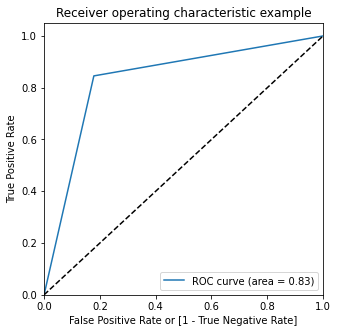

In [ ]:
draw_roc(y_test.Churn_flag, y_test_pred)

## <font color = Blue>Model Building - Good Preditive Model</font>

Good Predictive Model may not use the direct feature provided in the input it will customize and derive the input which will help to predict in better way, in our business case we will be using

### **Applying PCA**

#### Perform Split X & Y/Train&Test and Data Balancing

In [ ]:
# Split the X and Y data
X_raw = Churn_data_Proces.drop(['Churn_flag','mobile_number'], axis=1)
y_raw = Churn_data_Proces['Churn_flag']
X_raw.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_6n7_Month,data_vol_6,data_vol_7,data_vol_8,total_mou_6,total_mou_7,total_mou_8,aon_mon
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,1.403827e+09,1.406246e+09,1.409011e+09,0,0,779,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,592.5,0.0,0.00,0.00,1113.99,1167.28,778.90,26.733333
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,1.403654e+09,1.406765e+09,1.409357e+09,50,0,10,0.0,2.0,3.0,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,260.0,0.0,1106.95,11.97,612.22,460.15,188.10,10.500000
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,1.403222e+09,1.405987e+09,1.409357e+09,110,50,0,0.0,0.0,3.0,0,0,0,0,0,3,0,0,0,0,0,0,0.00,0.00,0.00,0.0,190.0,0.0,0.00,0.02,1875.70,364.99,2159.79,86.900000
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,

In [ ]:
# Split the Train and test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37410, 126)
(37410,)


#### Apply PCA

In [ ]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

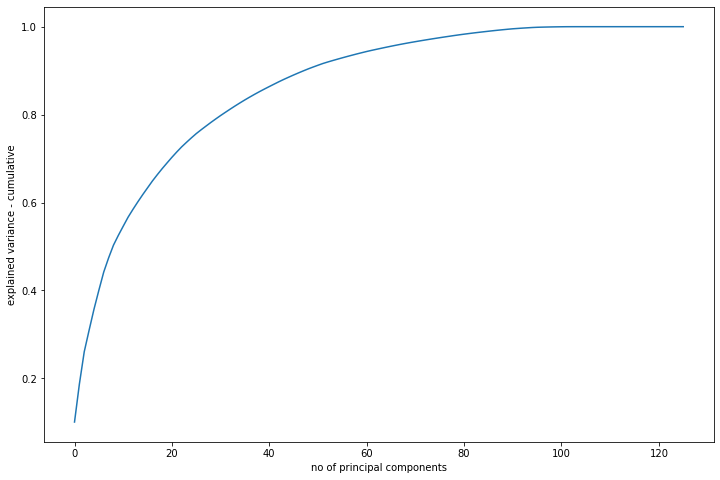

In [ ]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [ ]:
col = X_raw.columns
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)["Feature"]

0           arpu_6
1           arpu_7
2           arpu_8
3      onnet_mou_6
4      onnet_mou_7
5      onnet_mou_8
6     offnet_mou_6
7     offnet_mou_7
8     offnet_mou_8
9    roam_ic_mou_6
Name: Feature, dtype: object

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 

array([10.07, 18.71, 26.07, 30.97, 35.73, 40.04, 44.18, 47.4 , 50.3 ,
       52.53, 54.61, 56.66, 58.44, 60.14, 61.77, 63.33, 64.89, 66.32,
       67.69, 68.99, 70.27, 71.48, 72.64, 73.68, 74.69, 75.66, 76.53,
       77.37, 78.2 , 79.  , 79.78, 80.52, 81.25, 81.97, 82.66, 83.33,
       83.98, 84.61, 85.22, 85.8 , 86.37, 86.93, 87.48, 88.01, 88.51,
       89.  , 89.48, 89.94, 90.39, 90.81, 91.22, 91.61, 91.95, 92.28,
       92.6 , 92.91, 93.21, 93.5 , 93.79, 94.07, 94.34, 94.59, 94.83,
       95.07, 95.31, 95.54, 95.76, 95.98, 96.19, 96.39, 96.58, 96.77,
       96.95, 97.13, 97.3 , 97.47, 97.64, 97.8 , 97.96, 98.12, 98.27,
       98.41, 98.55, 98.68, 98.81, 98.94, 99.06, 99.18, 99.29, 99.4 ,
       99.5 , 99.58, 99.66, 99.73, 99.8 , 99.85, 99.88, 99.91, 99.93,
       99.95, 99.97, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98])

**55 columns explains 90% of the variance, lets apply PCA with 55 components**

In [ ]:
# PCA with 55 components
pca_55 = PCA(n_components=55)

df_tr_pca_55 = pca_55.fit_transform(X_tr)
print(df_tr_pca_55.shape)

df_test_pca_55 = pca_55.transform(X_test)
print(df_test_pca_55.shape)

(37410, 55)
(8548, 55)


### Logistic regression WIth PCA

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_55, y_tr)

# Predicted probabilities
y_pred55 = lr_pca1.predict(df_test_pca_55)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred55)

print("Accuracy with 55 PCAs: ",metrics.accuracy_score(y_test,y_pred55))

Accuracy with 55 PCAs:  0.8274450163781002


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred55))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred55))

[[6685 1355]
 [ 120  388]]
Accuracy of the logistic regression model with PCA:  0.8274450163781002


**Conclusion**
* Based on the above details after applying PCA with 55 Components results the accuracy of 82.35% and captures the Variance above 90%
* Key Feature that explains the functionality are 
      arpu_6
      arpu_7
      arpu_8
      onnet_mou_6
      onnet_mou_7
      onnet_mou_8
      offnet_mou_6
      offnet_mou_7
      offnet_mou_8
      roam_ic_mou_6



## **Decision Tree**

#### Modeling

In [ ]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37410, 126)
(37410,)


In [ ]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(37410, 96)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  21  22  24  26  29  30  31  32  34  35  36  38  41  42  43  44
  45  46  47  48  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  67  68  69  70  71  72  73  74  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  96  97  98 101 102 105 112 114 115 116 117 118 119
 120 121 122 123 124 125]


In [ ]:
# feature vector for decision tree
lasso_features = list(X_raw.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_i

In [ ]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8040
           1       0.24      0.67      0.36       508

    accuracy                           0.86      8548
   macro avg       0.61      0.77      0.64      8548
weighted avg       0.93      0.86      0.89      8548



In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[6986 1054]
 [ 170  338]]
Decision Tree - Accuracy : 0.8568086102012167


#### Hyper parameter Tuning

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.329653,0.005809,0.003249,0.000274,1,{'max_depth': 1},0.806335,0.846832,0.851243,0.844293,0.841620,0.838065,0.016179,39,0.846030,0.835906,0.834804,0.836541,0.837176,0.838091,0.004046
1,0.615685,0.006419,0.003132,0.000088,2,{'max_depth': 2},0.812884,0.855520,0.856990,0.853248,0.853381,0.846405,0.016818,38,0.854818,0.844159,0.843792,0.844727,0.844661,0.846431,0.004207
2,0.888371,0.008862,0.003080,0.000044,3,{'max_depth': 3},0.837878,0.870756,0.875969,0.872628,0.869554,0.865357,0.013909,37,0.869420,0.865778,0.865310,0.865410,0.866045,0.866393,0.001536
3,1.156243,0.011066,0.003204,0.000072,4,{'max_depth': 4},0.848035,0.875969,0.876370,0.878241,0.875301,0.870783,0.011416,36,0.889702,0.875468,0.871057,0.871191,0.871692,0.875822,0.007127
4,1.402377,0.007546,0.003391,0.000310,5,{'max_depth': 5},0.849505,0.887998,0.893077,0.892676,0.891607,0.882972,0.016829,35,0.897253,0.887964,0.889368,0.888265,0.887296,0.890029,0.003673


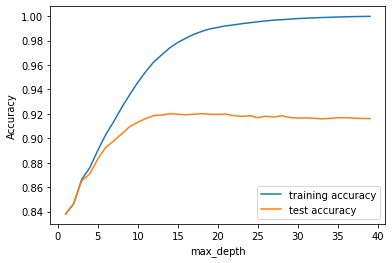

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# max_depth =10 seems to be the optimal one

In [ ]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [ ]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.349182,0.235307,0.003971,0.000090,5,{'min_samples_leaf': 5},0.865811,0.922614,0.919808,0.923684,0.924619,0.911307,0.022805,1,0.978315,0.970964,0.970563,0.970329,0.969460,0.971926,0.003232
1,3.523000,0.053184,0.004080,0.000851,25,{'min_samples_leaf': 25},0.862871,0.917268,0.915397,0.917134,0.911922,0.904918,0.021112,2,0.942562,0.926758,0.925521,0.927960,0.926991,0.929959,0.006350
2,3.185094,0.073467,0.004031,0.000523,45,{'min_samples_leaf': 45},0.850842,0.912457,0.907645,0.905373,0.904705,0.896204,0.022843,3,0.929898,0.914963,0.915731,0.914428,0.914628,0.917930,0.006001
3,2.958203,0.077922,0.003616,0.000075,65,{'min_samples_leaf': 65},0.861133,0.906442,0.906442,0.900160,0.902700,0.895376,0.017286,4,0.917201,0.907912,0.905974,0.906943,0.906008,0.908808,0.004257
4,2.878753,0.152301,0.003631,0.000059,85,{'min_samples_leaf': 85},0.855119,0.900962,0.903635,0.899626,0.901898,0.892248,0.018610,5,0.913325,0.902499,0.902566,0.899024,0.902499,0.903983,0.004864


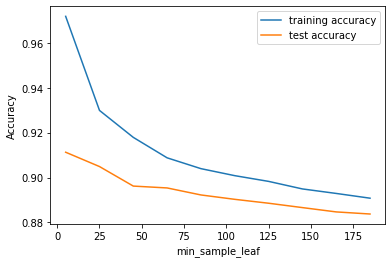

In [ ]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_sample_leaf =25 seems to be the optimal one

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.9068163592622295


In [ ]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8569255966307908


## **Random Forest**

### Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9246607393542349


In [ ]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8040
           1       0.40      0.51      0.45       508

    accuracy                           0.92      8548
   macro avg       0.68      0.73      0.70      8548
weighted avg       0.93      0.92      0.93      8548



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7643  397]
 [ 247  261]]


### Decision Tree - Hyper Tuning

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.094523,0.039369,0.057099,0.002569,2,{'max_depth': 2},0.833200,0.871959,0.859396,0.868484,0.861133,0.858835,0.013624,4,0.861701,0.870690,0.854217,0.864141,0.857993,0.861748,0.005595
1,11.424460,0.027672,0.080792,0.001418,7,{'max_depth': 7},0.880647,0.913793,0.920877,0.918471,0.915531,0.909864,0.014809,3,0.930767,0.919072,0.917803,0.918204,0.916967,0.920563,0.005147
2,16.867173,0.033573,0.110187,0.001293,12,{'max_depth': 12},0.907511,0.948543,0.952686,0.954157,0.953756,0.943331,0.018020,2,0.980353,0.974739,0.973904,0.974739,0.975274,0.975802,0.002317
3,20.123938,0.189975,0.131869,0.002857,17,{'max_depth': 17},0.915531,0.960171,0.964849,0.965517,0.964181,0.954050,0.019349,1,0.992616,0.991446,0.991480,0.991346,0.991312,0.991640,0.000492


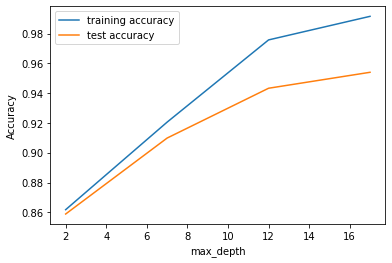

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_lasso, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 200),
    'min_samples_split': range(200, 300, 100),
    'n_estimators': [400 ,500], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

In [ ]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

In [ ]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')